# Descriptive analysis

- Combining whole dataset
- Delete any null
- Make labeling for companies + sentiments
- Define BR, RR and make their analysis

# 1)- Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [3]:
import pickle
#Loading from firm cleaned file
df = pd.read_excel('descript.xlsx')
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,TEXT,Sentiments
0,another reason failed love im poor born ordina...,1
1,2019 mercedesbenz c 300 amg c 43 first drive r...,2
2,happy birthday audi chasing maniac hope good d...,1
3,come see mercedes benz stadium atlanta,2
4,italy took cristiano ever since theyve trying ...,2


In [5]:
df.shape

(455727, 2)

In [6]:
df.Sentiments.value_counts()

2    409163
1     37462
0      9102
Name: Sentiments, dtype: int64

In [7]:
df.Sentiments.value_counts(normalize=True)

2    0.897825
1    0.082203
0    0.019972
Name: Sentiments, dtype: float64

### 2.1)- Loading 2nd dataset

In [8]:
company=pd.read_csv('entity_data.csv')
company.shape


(455724, 2)

In [9]:
company.head()

,TEXT,UTC DATE
0,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25
1,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15
2,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43
3,AND THIS WAS HOW I LANDED AT THE MERCEDES BENZ...,2018-07-31 22:31:40
4,a Porsche just drove past my house and I jokin...,2018-07-31 23:20:03


In [10]:
dtype(company['UTC DATE'])

dtype('O')

**Solving datetime issue**

In [11]:
company['date']=pd.to_datetime(company['UTC DATE'])

In [12]:
company.head()

,TEXT,UTC DATE,date
0,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,2018-07-31 23:02:25
1,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,2018-07-31 22:53:15
2,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43,2018-07-31 23:04:43
3,AND THIS WAS HOW I LANDED AT THE MERCEDES BENZ...,2018-07-31 22:31:40,2018-07-31 22:31:40
4,a Porsche just drove past my house and I jokin...,2018-07-31 23:20:03,2018-07-31 23:20:03


In [13]:
dtype(company['date'])

dtype('<M8[ns]')

### 2.2)- merging dataset

Only for time series vs BR, RR analysis

In [14]:
df['date']=company['date']

In [15]:
df.head(2)

,TEXT,Sentiments,date
0,another reason failed love im poor born ordina...,1,2018-07-31 23:02:25
1,2019 mercedesbenz c 300 amg c 43 first drive r...,2,2018-07-31 22:53:15


In [16]:
df.isnull().sum()

TEXT          13
Sentiments     0
date           3
dtype: int64

**For Descriptive analysis, we do not need text. So remove text**

In [17]:
df=df.drop('TEXT',axis=1)

In [18]:
df.isnull().sum()

Sentiments    0
date          3
dtype: int64

In [19]:
df["date"].fillna( method ='bfill', inplace = True) 

In [20]:
df["date"].fillna( method ='ffill', inplace = True) 

In [21]:
df.isnull().sum()

Sentiments    0
date          0
dtype: int64

### 2.3)- add labels

In [22]:
df['sentiment'] = df.Sentiments.map({0:'risk', 1:'benefit', 2:'neutral'})

In [23]:
df=df.drop('Sentiments', axis=1)

In [24]:
df.head()

,date,sentiment
0,2018-07-31 23:02:25,benefit
1,2018-07-31 22:53:15,neutral
2,2018-07-31 23:04:43,benefit
3,2018-07-31 22:31:40,neutral
4,2018-07-31 23:20:03,neutral


In [25]:
df.sentiment.value_counts()

neutral    409163
benefit     37462
risk         9102
Name: sentiment, dtype: int64

In [26]:
df.dtypes

date         datetime64[ns]
sentiment            object
dtype: object

**We shall start our work from here tomorrow**

### 2.4)- Time series

**Getting only Year, month and day**

In [27]:
df['Date'] = df['date'].dt.date

In [28]:
df.dtypes

date         datetime64[ns]
sentiment            object
Date                 object
dtype: object

In [29]:
df.head()

,date,sentiment,Date
0,2018-07-31 23:02:25,benefit,2018-07-31
1,2018-07-31 22:53:15,neutral,2018-07-31
2,2018-07-31 23:04:43,benefit,2018-07-31
3,2018-07-31 22:31:40,neutral,2018-07-31
4,2018-07-31 23:20:03,neutral,2018-07-31


In [30]:
df=df.drop('date', axis=1)

In [31]:
df.head()

,sentiment,Date
0,benefit,2018-07-31
1,neutral,2018-07-31
2,benefit,2018-07-31
3,neutral,2018-07-31
4,neutral,2018-07-31


**Converting to datetime from Object type**

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df.dtypes

sentiment            object
Date         datetime64[ns]
dtype: object

In [34]:
df['Date'].dt.year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Date, dtype: int64

In [35]:
df['Date'].dt.year.sort_values()[:5]

455726    2016
191113    2016
191114    2016
191115    2016
191116    2016
Name: Date, dtype: int64

In [36]:
data_year=df['Date'].dt.year.sort_values()

In [37]:
j=df.groupby(data_year)['sentiment'].value_counts()

In [38]:
j

Date  sentiment
2016  neutral      152850
      benefit       13655
      risk           3454
2017  neutral      130086
      benefit       11624
      risk           2960
2018  neutral      125959
      benefit       12150
      risk           2688
2019  neutral         268
      benefit          33
Name: sentiment, dtype: int64

In [43]:
type(j)

pandas.core.series.Series

In [44]:
j_df=pd.DataFrame(j)

In [45]:
j_df

sentiment
Date sentiment           
2016 neutral       152850
     benefit        13655
     risk            3454
2017 neutral       130086
     benefit        11624
     risk            2960
2018 neutral       125959
     benefit        12150
     risk            2688
2019 neutral          268
     benefit           33

We have problem of two sentiment in columns. We need to fix it by count() method

# 3)- Make a dataframe

- For year
- For month

In [48]:
new_df=df[['sentiment','Date']]
new_df.head()

,sentiment,Date
0,benefit,2018-07-31
1,neutral,2018-07-31
2,benefit,2018-07-31
3,neutral,2018-07-31
4,neutral,2018-07-31


In [51]:
new_df['year']= new_df['Date'].dt.year

In [52]:
new_df.head()

,sentiment,Date,year
0,benefit,2018-07-31,2018
1,neutral,2018-07-31,2018
2,benefit,2018-07-31,2018
3,neutral,2018-07-31,2018
4,neutral,2018-07-31,2018


In [54]:
new_df=new_df.drop('Date', axis=1)

In [ ]:
ctdf = (df.reset_index()
          .groupby(['year','categorical'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [55]:
df_ct = (new_df.reset_index()
          .groupby(['year','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [56]:
df_ct

,year,sentiment,ct
0,2016,benefit,13655
1,2016,neutral,152850
2,2016,risk,3454
3,2017,benefit,11624
4,2017,neutral,130086
5,2017,risk,2960
6,2018,benefit,12150
7,2018,neutral,125959
8,2018,risk,2688
9,2019,benefit,33


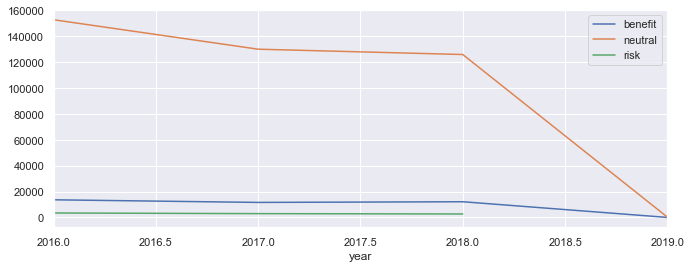

In [58]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in df_ct.groupby('sentiment'):
    data.plot(x='year', y='ct', ax=ax, label=key)

In [59]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

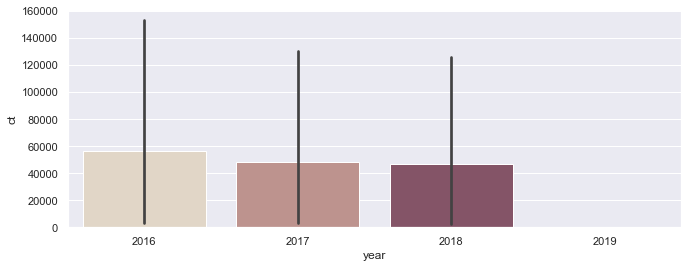

In [70]:
sns.barplot(x="year", y="ct", palette="ch:.25", data=df_ct);

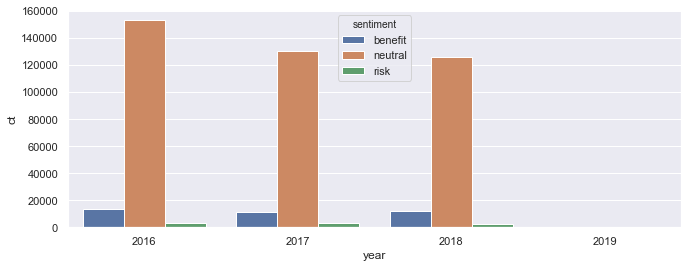

In [66]:
sns.barplot(x="year", y="ct",hue="sentiment", data=df_ct);

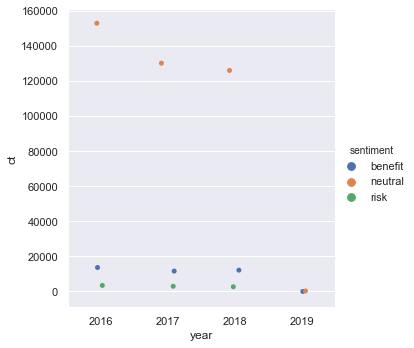

In [71]:
sns.catplot(x="year", y="ct",hue="sentiment", data=df_ct);

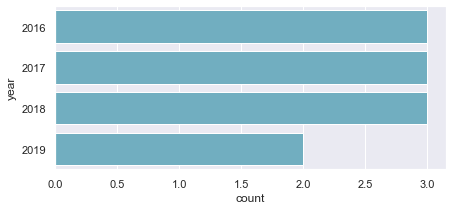

In [72]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="year", data=df_ct, color="c");

### For monthly trend

In [73]:
df.head()

,sentiment,Date
0,benefit,2018-07-31
1,neutral,2018-07-31
2,benefit,2018-07-31
3,neutral,2018-07-31
4,neutral,2018-07-31


In [75]:
df.dtypes

sentiment            object
Date         datetime64[ns]
dtype: object

In [76]:
# making new dataframe
df_month=df[['sentiment','Date']]

In [79]:
df_month['month']=df['Date'].dt.month.sort_values()
df_month=df_month.drop('Date', axis=1)

In [80]:
df_month.head(2)

,sentiment,month
0,benefit,7
1,neutral,7


In [81]:
df_month.month.unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6])

**As we can see that there should be more month from 2016 to 2019. We have not got all month count correct**

# 4)- Fixing month problem

### 2.4)- Add RR and BR 

Do it manually

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

### 2.5)- Making two classes only

In [ ]:
df=df[df.sentiment!= "neutral"]

In [ ]:
df.shape

In [ ]:
df.head()

# 3)- Plotting sentiments against time period

### 3.1-Start with removing neutral sentiments

In [ ]:
data_year=df['Date'].dt.year.sort_values()

In [ ]:
j=df.groupby(data_year)['sentiment'].value_counts()

In [ ]:
j

### try sns

In [39]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
sns.catplot(x="Date", y="sentiment", data=j);

### 3.2-Year Vice trend of risk-benefit tweets

In [ ]:
j=j.unstack('sentiment')

In [ ]:
j

In [ ]:
j.plot()
plt.xlabel('Year-vice trend of tweets')
plt.ylabel('risk-benefit output yearly')
plt.title('Change in the risk-benefit tweets over the years')
plt.legend()
plt.show()

### 3.3-Monthly Trends

In [ ]:
data_month=df['Date'].dt.month.sort_values()

In [ ]:
data_month.unique()

In [ ]:
k=df.groupby(data_month)['sentiment'].value_counts()

In [ ]:
k[:10]

In [ ]:
k=k.unstack('sentiment')

In [ ]:
k

In [ ]:
k.plot()
plt.xlabel('monthly trend')
plt.ylabel('Risk-benefit output for tweets')
plt.title('Change in the tweets trends for risk-benefit over monthly basis')
plt.legend()
plt.show()

### 3.4-Index Date

In [ ]:
df=df.set_index('Date')
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.index

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
df['sentiment'].plot(linewidth=0.5);

In [ ]:
df2.shape

In [ ]:
df[['ID','timestamp','User_ID','Date','Q']]=df2[['TWEET ID','TIMESTAMP','USER ID','UTC DATE','Q']]

# 2)- Code for encoding

In [ ]:
# df['labels'] = df.sent_numeric.map({'Risky':0, 'Beneficial':1, 'Neutral':2})

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
# check if any missing

df.isnull().sum()

**Do Forward filling**

In [ ]:
df.fillna( method ='ffill', inplace = True) 

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

**remove 1st row from data**

In [ ]:
df=df.drop(index=0,axis=0)

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

**Labeling data**

In [ ]:
df['sentiment_labels'] = df.Sentiments.map({0:'RR', 1:'BR', 2:'Neutral'})

# Risk Rate, Benefit Rate

In [ ]:
df['sentiment_labels'].value_counts()

In [ ]:
df['sentiment_labels'].value_counts(normalize=True)

# 3)- Getting company names
from company_label notebook

In [ ]:
company = pd.read_pickle('company_label.pkl')

In [ ]:
company.head()

In [ ]:
company.shape

### 3.1)- Merging dataframes



### 3.2)-Making two classes only

getting rid of Neutral

In [ ]:
df=df[df.sentiment_labels!= "Neutral"]

In [ ]:
df.shape

**Save work**

In [ ]:
df.to_pickle('final_descript.pkl')

# 4)- Descriptive analysis

### 4a)- Word cloud

use final_descript.pkl

### 4b)- Getting company names 


from company_label notebook

### 3b)- Work on RR and BR

# END of Notebook